# MINI PROJECT
## Part 1 : Linear Regression and Graphing

In this miniproject, we will need to import the basic libraries of python, and then seaborn as well as pyplot to visualize our graph. Next, we will also need to import some model from scikit-learn to do linear regression on the data.

In [2]:
#Line 1, Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

#Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Create a Linear Regression object
linreg = LinearRegression()

The next thing we need to do is to import the data itself, which is available as a csv file and taken from this following website : "https://data.gov.sg/dataset/resale-flat-prices"

In [4]:
#Line 15, Import Dataset
csv = 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
data = pd.read_csv(csv)
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In the following code, we are creating a jointplot of the whole data of floor_area_sqm against the resale_price. We are then looking for the correlation score (R squared) between the variables.

                     floor_area_sqm  lease_commence_date  resale_price
floor_area_sqm             1.000000             0.149609      0.621364
lease_commence_date        0.149609             1.000000      0.350585
resale_price               0.621364             0.350585      1.000000


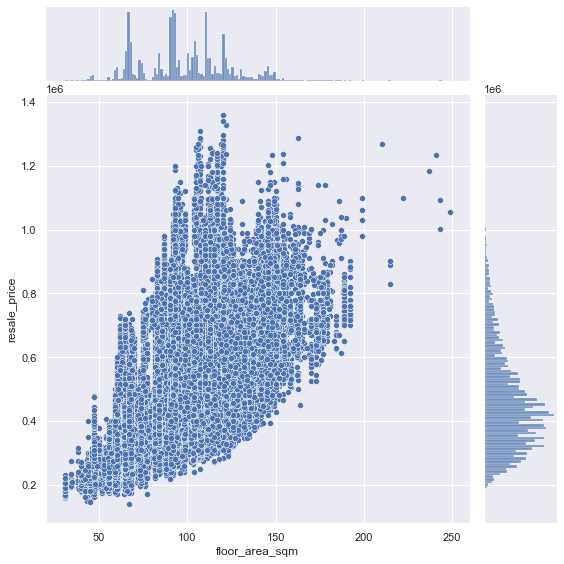

In [5]:
#Line 19, Establish Correlation
sb.jointplot(x="floor_area_sqm", y="resale_price", data=data, height = 8)

CorrIndexScore = data.corr()
print(CorrIndexScore)

From the graph, we can see that there is some correlation between the floor_area_sqm and the resale_price since the R squared value is 0.62. We want to look further into it and see how the different towns will affect the relation between the 2 variables (mainly the slope of the best-fit line since it tells us what town is the most "worth it" in terms of price per area). Therefore, we need to create new dataframes containing floor_area_sqm and resale_price that separate each town individually.

In the following cell, we are checking how many different towns there are in the original dataset.

In [6]:
#Line 24, List out the different locations
data["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [7]:
#Line 26, Start Splitting the dataframe to each respective locations
ang_mo_kio = pd.DataFrame(data.loc[(data["town"] == "ANG MO KIO"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
ang_mo_kio

,town,floor_area_sqm,resale_price,flat_type,month
0,ANG MO KIO,44.0,232000.0,2 ROOM,2017-01
1,ANG MO KIO,67.0,250000.0,3 ROOM,2017-01
2,ANG MO KIO,67.0,262000.0,3 ROOM,2017-01
3,ANG MO KIO,68.0,265000.0,3 ROOM,2017-01
4,ANG MO KIO,67.0,265000.0,3 ROOM,2017-01
...,...,...,...,...,...
5113,ANG MO KIO,121.0,645000.0,5 ROOM,2022-02
5114,ANG MO KIO,111.0,840000.0,5 ROOM,2022-02
5115,ANG MO KIO,113.0,1050000.0,5 ROOM,2022-02
5116,ANG MO KIO,113.0,938000.0,5 ROOM,2022-02


In [8]:
bedok = pd.DataFrame(data.loc[(data["town"] == "BEDOK"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bedok

,town,floor_area_sqm,resale_price,flat_type,month
0,BEDOK,45.0,238000.0,2 ROOM,2017-01
1,BEDOK,68.0,272000.0,3 ROOM,2017-01
2,BEDOK,59.0,278000.0,3 ROOM,2017-01
3,BEDOK,68.0,280000.0,3 ROOM,2017-01
4,BEDOK,59.0,280000.0,3 ROOM,2017-01
...,...,...,...,...,...
6565,BEDOK,133.0,595000.0,5 ROOM,2022-02
6566,BEDOK,133.0,595500.0,5 ROOM,2022-02
6567,BEDOK,128.0,710000.0,5 ROOM,2022-02
6568,BEDOK,123.0,690000.0,5 ROOM,2022-02


In [29]:
bishan = pd.DataFrame(data.loc[(data["town"] == "BISHAN"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bishan

,town,floor_area_sqm,resale_price,flat_type,month
0,BISHAN,68.0,275000.0,3 ROOM,2017-01
1,BISHAN,64.0,320000.0,3 ROOM,2017-01
2,BISHAN,64.0,395000.0,3 ROOM,2017-01
3,BISHAN,84.0,380000.0,4 ROOM,2017-01
4,BISHAN,84.0,475000.0,4 ROOM,2017-01
...,...,...,...,...,...
2351,BISHAN,121.0,823000.0,5 ROOM,2022-02
2352,BISHAN,121.0,820000.0,5 ROOM,2022-02
2353,BISHAN,135.0,965000.0,5 ROOM,2022-02
2354,BISHAN,146.0,1080000.0,EXECUTIVE,2022-02


In [31]:
bukit_batok = pd.DataFrame(data.loc[(data["town"] == "BUKIT BATOK"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bukit_batok

,town,floor_area_sqm,resale_price,flat_type,month
0,BUKIT BATOK,64.0,255000.0,3 ROOM,2017-01
1,BUKIT BATOK,64.0,255000.0,3 ROOM,2017-01
2,BUKIT BATOK,68.0,260000.0,3 ROOM,2017-01
3,BUKIT BATOK,60.0,260000.0,3 ROOM,2017-01
4,BUKIT BATOK,73.0,260000.0,3 ROOM,2017-01
...,...,...,...,...,...
4017,BUKIT BATOK,142.0,810000.0,EXECUTIVE,2022-02
4018,BUKIT BATOK,150.0,730000.0,EXECUTIVE,2022-02
4019,BUKIT BATOK,144.0,750000.0,EXECUTIVE,2022-02
4020,BUKIT BATOK,148.0,715000.0,EXECUTIVE,2022-02


In [32]:
bukit_merah = pd.DataFrame(data.loc[(data["town"] == "BUKIT MERAH"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bukit_merah

,town,floor_area_sqm,resale_price,flat_type,month
0,BUKIT MERAH,34.0,218000.0,2 ROOM,2017-01
1,BUKIT MERAH,34.0,230000.0,2 ROOM,2017-01
2,BUKIT MERAH,45.0,245000.0,2 ROOM,2017-01
3,BUKIT MERAH,51.0,300000.0,2 ROOM,2017-01
4,BUKIT MERAH,65.0,295000.0,3 ROOM,2017-01
...,...,...,...,...,...
4691,BUKIT MERAH,110.0,830000.0,5 ROOM,2022-02
4692,BUKIT MERAH,126.0,858000.0,5 ROOM,2022-02
4693,BUKIT MERAH,115.0,920000.0,5 ROOM,2022-02
4694,BUKIT MERAH,120.0,690000.0,5 ROOM,2022-02


In [33]:
bukit_panjang = pd.DataFrame(data.loc[(data["town"] == "BUKIT PANJANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bukit_panjang

,town,floor_area_sqm,resale_price,flat_type,month
0,BUKIT PANJANG,73.0,266000.0,3 ROOM,2017-01
1,BUKIT PANJANG,73.0,276000.0,3 ROOM,2017-01
2,BUKIT PANJANG,73.0,298000.0,3 ROOM,2017-01
3,BUKIT PANJANG,68.0,325000.0,3 ROOM,2017-01
4,BUKIT PANJANG,101.0,318000.0,4 ROOM,2017-01
...,...,...,...,...,...
4725,BUKIT PANJANG,143.0,680000.0,EXECUTIVE,2022-02
4726,BUKIT PANJANG,125.0,545500.0,EXECUTIVE,2022-02
4727,BUKIT PANJANG,130.0,525000.0,EXECUTIVE,2022-02
4728,BUKIT PANJANG,133.0,565000.0,EXECUTIVE,2022-02


In [34]:
bukit_timah = pd.DataFrame(data.loc[(data["town"] == "BUKIT TIMAH"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
bukit_timah

,town,floor_area_sqm,resale_price,flat_type,month
0,BUKIT TIMAH,104.0,670000.0,4 ROOM,2017-01
1,BUKIT TIMAH,120.0,890000.0,5 ROOM,2017-01
2,BUKIT TIMAH,146.0,876888.0,EXECUTIVE,2017-01
3,BUKIT TIMAH,74.0,425000.0,3 ROOM,2017-02
4,BUKIT TIMAH,122.0,710000.0,5 ROOM,2017-02
...,...,...,...,...,...
324,BUKIT TIMAH,146.0,1202000.0,EXECUTIVE,2022-01
325,BUKIT TIMAH,74.0,450000.0,3 ROOM,2022-02
326,BUKIT TIMAH,104.0,776000.0,4 ROOM,2022-02
327,BUKIT TIMAH,104.0,775000.0,4 ROOM,2022-02


In [35]:
central_area = pd.DataFrame(data.loc[(data["town"] == "CENTRAL AREA"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
central_area

,town,floor_area_sqm,resale_price,flat_type,month
0,CENTRAL AREA,55.0,250000.0,2 ROOM,2017-01
1,CENTRAL AREA,84.0,360000.0,3 ROOM,2017-01
2,CENTRAL AREA,68.0,400000.0,3 ROOM,2017-01
3,CENTRAL AREA,66.0,428000.0,3 ROOM,2017-01
4,CENTRAL AREA,59.0,455000.0,3 ROOM,2017-01
...,...,...,...,...,...
1004,CENTRAL AREA,84.0,480000.0,4 ROOM,2022-02
1005,CENTRAL AREA,106.0,1235000.0,5 ROOM,2022-02
1006,CENTRAL AREA,105.0,1130000.0,5 ROOM,2022-02
1007,CENTRAL AREA,106.0,1268000.0,5 ROOM,2022-02


In [36]:
choa_chu_kang = pd.DataFrame(data.loc[(data["town"] == "CHOA CHU KANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
choa_chu_kang

,town,floor_area_sqm,resale_price,flat_type,month
0,CHOA CHU KANG,73.0,273000.0,3 ROOM,2017-01
1,CHOA CHU KANG,73.0,285000.0,3 ROOM,2017-01
2,CHOA CHU KANG,73.0,293000.0,3 ROOM,2017-01
3,CHOA CHU KANG,104.0,316000.0,4 ROOM,2017-01
4,CHOA CHU KANG,103.0,316000.0,4 ROOM,2017-01
...,...,...,...,...,...
5419,CHOA CHU KANG,119.0,452000.0,5 ROOM,2022-02
5420,CHOA CHU KANG,121.0,480000.0,5 ROOM,2022-02
5421,CHOA CHU KANG,119.0,460000.0,5 ROOM,2022-02
5422,CHOA CHU KANG,143.0,670000.0,EXECUTIVE,2022-02


In [11]:
clementi = pd.DataFrame(data.loc[(data["town"] == "CLEMENTI"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
clementi

,town,floor_area_sqm,resale_price,flat_type,month
0,CLEMENTI,68.0,263800.0,3 ROOM,2017-01
1,CLEMENTI,68.0,270000.0,3 ROOM,2017-01
2,CLEMENTI,67.0,280000.0,3 ROOM,2017-01
3,CLEMENTI,67.0,290000.0,3 ROOM,2017-01
4,CLEMENTI,68.0,326000.0,3 ROOM,2017-01
...,...,...,...,...,...
2753,CLEMENTI,113.0,1060000.0,5 ROOM,2022-02
2754,CLEMENTI,113.0,1060000.0,5 ROOM,2022-02
2755,CLEMENTI,121.0,610000.0,5 ROOM,2022-02
2756,CLEMENTI,118.0,672000.0,5 ROOM,2022-02


In [12]:
geylang = pd.DataFrame(data.loc[(data["town"] == "GEYLANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
geylang

,town,floor_area_sqm,resale_price,flat_type,month
0,GEYLANG,42.0,205000.0,2 ROOM,2017-01
1,GEYLANG,42.0,215000.0,2 ROOM,2017-01
2,GEYLANG,46.0,220000.0,2 ROOM,2017-01
3,GEYLANG,60.0,230000.0,3 ROOM,2017-01
4,GEYLANG,60.0,235000.0,3 ROOM,2017-01
...,...,...,...,...,...
2970,GEYLANG,127.0,760000.0,5 ROOM,2022-02
2971,GEYLANG,140.0,880000.0,5 ROOM,2022-02
2972,GEYLANG,121.0,855000.0,5 ROOM,2022-02
2973,GEYLANG,145.0,965000.0,EXECUTIVE,2022-02


In [13]:
hougang = pd.DataFrame(data.loc[(data["town"] == "HOUGANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
hougang

,town,floor_area_sqm,resale_price,flat_type,month
0,HOUGANG,47.0,252000.0,2 ROOM,2017-01
1,HOUGANG,73.0,260000.0,3 ROOM,2017-01
2,HOUGANG,60.0,268000.0,3 ROOM,2017-01
3,HOUGANG,67.0,269000.0,3 ROOM,2017-01
4,HOUGANG,67.0,270000.0,3 ROOM,2017-01
...,...,...,...,...,...
5927,HOUGANG,112.0,760000.0,5 ROOM,2022-02
5928,HOUGANG,146.0,835000.0,EXECUTIVE,2022-02
5929,HOUGANG,138.0,900000.0,EXECUTIVE,2022-02
5930,HOUGANG,144.0,868888.0,EXECUTIVE,2022-02


In [14]:
jurong_east = pd.DataFrame(data.loc[(data["town"] == "JURONG EAST"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
jurong_east

,town,floor_area_sqm,resale_price,flat_type,month
0,JURONG EAST,72.0,250000.0,3 ROOM,2017-01
1,JURONG EAST,67.0,250000.0,3 ROOM,2017-01
2,JURONG EAST,68.0,257500.0,3 ROOM,2017-01
3,JURONG EAST,67.0,260000.0,3 ROOM,2017-01
4,JURONG EAST,67.0,265000.0,3 ROOM,2017-01
...,...,...,...,...,...
2585,JURONG EAST,146.0,680000.0,EXECUTIVE,2022-02
2586,JURONG EAST,145.0,898000.0,EXECUTIVE,2022-02
2587,JURONG EAST,144.0,885000.0,EXECUTIVE,2022-02
2588,JURONG EAST,144.0,850000.0,EXECUTIVE,2022-02


In [15]:
jurong_west = pd.DataFrame(data.loc[(data["town"] == "JURONG WEST"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
jurong_west

,town,floor_area_sqm,resale_price,flat_type,month
0,JURONG WEST,56.0,240000.0,2 ROOM,2017-01
1,JURONG WEST,52.0,258000.0,2 ROOM,2017-01
2,JURONG WEST,59.0,240000.0,3 ROOM,2017-01
3,JURONG WEST,67.0,240000.0,3 ROOM,2017-01
4,JURONG WEST,59.0,245000.0,3 ROOM,2017-01
...,...,...,...,...,...
8129,JURONG WEST,143.0,620000.0,EXECUTIVE,2022-02
8130,JURONG WEST,145.0,700000.0,EXECUTIVE,2022-02
8131,JURONG WEST,147.0,685000.0,EXECUTIVE,2022-02
8132,JURONG WEST,143.0,700000.0,EXECUTIVE,2022-02


In [16]:
kallang_whampoa = pd.DataFrame(data.loc[(data["town"] == "KALLANG/WHAMPOA"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
kallang_whampoa

,town,floor_area_sqm,resale_price,flat_type,month
0,KALLANG/WHAMPOA,48.0,276000.0,2 ROOM,2017-01
1,KALLANG/WHAMPOA,56.0,225000.0,3 ROOM,2017-01
2,KALLANG/WHAMPOA,65.0,276000.0,3 ROOM,2017-01
3,KALLANG/WHAMPOA,59.0,286000.0,3 ROOM,2017-01
4,KALLANG/WHAMPOA,65.0,292000.0,3 ROOM,2017-01
...,...,...,...,...,...
3500,KALLANG/WHAMPOA,114.0,529000.0,5 ROOM,2022-02
3501,KALLANG/WHAMPOA,131.0,780000.0,5 ROOM,2022-02
3502,KALLANG/WHAMPOA,139.0,930000.0,5 ROOM,2022-02
3503,KALLANG/WHAMPOA,116.0,1135000.0,5 ROOM,2022-02


In [17]:
marine_parade = pd.DataFrame(data.loc[(data["town"] == "MARINE PARADE"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
marine_parade

,town,floor_area_sqm,resale_price,flat_type,month
0,MARINE PARADE,65.0,360000.0,3 ROOM,2017-01
1,MARINE PARADE,76.0,420000.0,3 ROOM,2017-01
2,MARINE PARADE,88.0,538000.0,4 ROOM,2017-01
3,MARINE PARADE,87.0,580000.0,4 ROOM,2017-01
4,MARINE PARADE,65.0,375000.0,3 ROOM,2017-02
...,...,...,...,...,...
742,MARINE PARADE,65.0,372000.0,3 ROOM,2022-02
743,MARINE PARADE,88.0,540000.0,4 ROOM,2022-02
744,MARINE PARADE,82.0,522000.0,4 ROOM,2022-02
745,MARINE PARADE,120.0,900000.0,5 ROOM,2022-02


In [18]:
pasir_ris = pd.DataFrame(data.loc[(data["town"] == "PASIR RIS"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
pasir_ris

,town,floor_area_sqm,resale_price,flat_type,month
0,PASIR RIS,66.0,286000.0,3 ROOM,2017-01
1,PASIR RIS,105.0,368000.0,4 ROOM,2017-01
2,PASIR RIS,105.0,368000.0,4 ROOM,2017-01
3,PASIR RIS,104.0,377000.0,4 ROOM,2017-01
4,PASIR RIS,103.0,380000.0,4 ROOM,2017-01
...,...,...,...,...,...
3775,PASIR RIS,146.0,635000.0,EXECUTIVE,2022-02
3776,PASIR RIS,161.0,780000.0,EXECUTIVE,2022-02
3777,PASIR RIS,148.0,695000.0,EXECUTIVE,2022-02
3778,PASIR RIS,144.0,868000.0,EXECUTIVE,2022-02


In [19]:
punggol = pd.DataFrame(data.loc[(data["town"] == "PUNGGOL"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
punggol

,town,floor_area_sqm,resale_price,flat_type,month
0,PUNGGOL,85.0,350000.0,4 ROOM,2017-01
1,PUNGGOL,91.0,370000.0,4 ROOM,2017-01
2,PUNGGOL,91.0,370000.0,4 ROOM,2017-01
3,PUNGGOL,90.0,380000.0,4 ROOM,2017-01
4,PUNGGOL,92.0,408000.0,4 ROOM,2017-01
...,...,...,...,...,...
8826,PUNGGOL,114.0,660000.0,5 ROOM,2022-02
8827,PUNGGOL,112.0,628000.0,5 ROOM,2022-02
8828,PUNGGOL,112.0,676400.0,5 ROOM,2022-02
8829,PUNGGOL,112.0,605000.0,5 ROOM,2022-02


In [20]:
queenstown = pd.DataFrame(data.loc[(data["town"] == "QUEENSTOWN"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
queenstown

,town,floor_area_sqm,resale_price,flat_type,month
0,QUEENSTOWN,60.0,290000.0,3 ROOM,2017-01
1,QUEENSTOWN,60.0,299800.0,3 ROOM,2017-01
2,QUEENSTOWN,67.0,300000.0,3 ROOM,2017-01
3,QUEENSTOWN,60.0,307000.0,3 ROOM,2017-01
4,QUEENSTOWN,60.0,310000.0,3 ROOM,2017-01
...,...,...,...,...,...
3475,QUEENSTOWN,121.0,875000.0,5 ROOM,2022-02
3476,QUEENSTOWN,99.0,980000.0,5 ROOM,2022-02
3477,QUEENSTOWN,117.0,1180000.0,5 ROOM,2022-02
3478,QUEENSTOWN,149.0,1080000.0,EXECUTIVE,2022-02


In [21]:
sembawang = pd.DataFrame(data.loc[(data["town"] == "SEMBAWANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
sembawang

,town,floor_area_sqm,resale_price,flat_type,month
0,SEMBAWANG,86.0,305000.0,4 ROOM,2017-01
1,SEMBAWANG,100.0,335000.0,4 ROOM,2017-01
2,SEMBAWANG,100.0,342000.0,4 ROOM,2017-01
3,SEMBAWANG,91.0,358000.0,4 ROOM,2017-01
4,SEMBAWANG,96.0,363000.0,4 ROOM,2017-01
...,...,...,...,...,...
2812,SEMBAWANG,120.0,520000.0,5 ROOM,2022-02
2813,SEMBAWANG,110.0,485000.0,5 ROOM,2022-02
2814,SEMBAWANG,137.0,610000.0,EXECUTIVE,2022-02
2815,SEMBAWANG,125.0,608888.0,EXECUTIVE,2022-02


In [22]:
sengkang = pd.DataFrame(data.loc[(data["town"] == "SENGKANG"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
sengkang

,town,floor_area_sqm,resale_price,flat_type,month
0,SENGKANG,50.0,273000.0,2 ROOM,2017-01
1,SENGKANG,69.0,342000.0,3 ROOM,2017-01
2,SENGKANG,67.0,345000.0,3 ROOM,2017-01
3,SENGKANG,67.0,348000.0,3 ROOM,2017-01
4,SENGKANG,68.0,360000.0,3 ROOM,2017-01
...,...,...,...,...,...
10247,SENGKANG,130.0,630000.0,EXECUTIVE,2022-02
10248,SENGKANG,125.0,628888.0,EXECUTIVE,2022-02
10249,SENGKANG,134.0,620000.0,EXECUTIVE,2022-02
10250,SENGKANG,135.0,720000.0,EXECUTIVE,2022-02


In [23]:
serangoon = pd.DataFrame(data.loc[(data["town"] == "SERANGOON"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
serangoon

,town,floor_area_sqm,resale_price,flat_type,month
0,SERANGOON,67.0,292000.0,3 ROOM,2017-01
1,SERANGOON,73.0,318000.0,3 ROOM,2017-01
2,SERANGOON,67.0,319000.0,3 ROOM,2017-01
3,SERANGOON,64.0,320000.0,3 ROOM,2017-01
4,SERANGOON,73.0,320000.0,3 ROOM,2017-01
...,...,...,...,...,...
2335,SERANGOON,150.0,988000.0,EXECUTIVE,2022-02
2336,SERANGOON,146.0,980000.0,EXECUTIVE,2022-02
2337,SERANGOON,147.0,808000.0,EXECUTIVE,2022-02
2338,SERANGOON,156.0,888888.0,EXECUTIVE,2022-02


In [24]:
tampines = pd.DataFrame(data.loc[(data["town"] == "TAMPINES"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
tampines

,town,floor_area_sqm,resale_price,flat_type,month
0,TAMPINES,45.0,250000.0,2 ROOM,2017-01
1,TAMPINES,60.0,270000.0,3 ROOM,2017-01
2,TAMPINES,68.0,295000.0,3 ROOM,2017-01
3,TAMPINES,69.0,300000.0,3 ROOM,2017-01
4,TAMPINES,64.0,305000.0,3 ROOM,2017-01
...,...,...,...,...,...
8205,TAMPINES,146.0,774000.0,EXECUTIVE,2022-02
8206,TAMPINES,147.0,895000.0,EXECUTIVE,2022-02
8207,TAMPINES,146.0,828000.0,EXECUTIVE,2022-02
8208,TAMPINES,146.0,848888.0,EXECUTIVE,2022-02


In [25]:
toa_payoh = pd.DataFrame(data.loc[(data["town"] == "TOA PAYOH"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
toa_payoh

,town,floor_area_sqm,resale_price,flat_type,month
0,TOA PAYOH,43.0,228500.0,2 ROOM,2017-01
1,TOA PAYOH,66.0,268000.0,3 ROOM,2017-01
2,TOA PAYOH,64.0,283000.0,3 ROOM,2017-01
3,TOA PAYOH,65.0,285000.0,3 ROOM,2017-01
4,TOA PAYOH,66.0,285000.0,3 ROOM,2017-01
...,...,...,...,...,...
3876,TOA PAYOH,146.0,868000.0,EXECUTIVE,2022-02
3877,TOA PAYOH,146.0,988888.0,EXECUTIVE,2022-02
3878,TOA PAYOH,146.0,808000.0,EXECUTIVE,2022-02
3879,TOA PAYOH,151.0,950000.0,EXECUTIVE,2022-02


In [26]:
woodlands = pd.DataFrame(data.loc[(data["town"] == "WOODLANDS"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
woodlands

,town,floor_area_sqm,resale_price,flat_type,month
0,WOODLANDS,67.0,242000.0,3 ROOM,2017-01
1,WOODLANDS,73.0,255000.0,3 ROOM,2017-01
2,WOODLANDS,65.0,270000.0,3 ROOM,2017-01
3,WOODLANDS,72.0,300000.0,3 ROOM,2017-01
4,WOODLANDS,91.0,288000.0,4 ROOM,2017-01
...,...,...,...,...,...
8261,WOODLANDS,177.0,820000.0,EXECUTIVE,2022-02
8262,WOODLANDS,177.0,830000.0,EXECUTIVE,2022-02
8263,WOODLANDS,143.0,765000.0,EXECUTIVE,2022-02
8264,WOODLANDS,177.0,868000.0,EXECUTIVE,2022-02


In [27]:
yishun = pd.DataFrame(data.loc[(data["town"] == "YISHUN"),  

        ["town","floor_area_sqm","resale_price","flat_type", "month"]]).reset_index(drop=True)
yishun

,town,floor_area_sqm,resale_price,flat_type,month
0,YISHUN,47.0,235000.0,2 ROOM,2017-01
1,YISHUN,64.0,250000.0,3 ROOM,2017-01
2,YISHUN,64.0,250000.0,3 ROOM,2017-01
3,YISHUN,64.0,264888.0,3 ROOM,2017-01
4,YISHUN,67.0,265000.0,3 ROOM,2017-01
...,...,...,...,...,...
8067,YISHUN,187.0,1038000.0,EXECUTIVE,2022-02
8068,YISHUN,142.0,680000.0,EXECUTIVE,2022-02
8069,YISHUN,146.0,800000.0,EXECUTIVE,2022-02
8070,YISHUN,171.0,842000.0,MULTI-GENERATION,2022-02


After we created the dataframes, we will now create a for loop that finds out the coefficient and intercept of the best-fit line of resale_price against floor_area_sqm for each town. We will then sort the towns from the lowest coefficient (gradient).

In [37]:
#Line 131, Use for loop to regress floor area vs resale price on every single location
var = [ang_mo_kio, bedok, bishan, bukit_batok, bukit_merah,
       bukit_panjang, bukit_timah, central_area, choa_chu_kang,
       clementi, geylang, hougang, jurong_east, jurong_west,
       kallang_whampoa, marine_parade, pasir_ris, punggol,
       queenstown, sembawang, sengkang, serangoon, tampines,
       toa_payoh, woodlands, yishun]

count = 0
linreg_int = pd.DataFrame(columns = ['Town', 'Coefficient', 'Intercept'])

for x in var:
    
    floor_area = pd.DataFrame(x["floor_area_sqm"])
    sale_price = pd.DataFrame(x["resale_price"])

    linreg.fit(floor_area, sale_price)
    
    linreg_int.loc[count] = [data["town"].unique().tolist()[count], linreg.coef_, linreg.intercept_]
    count += 1

#Line 152, compile the regressed results into a new dataframe and sort in ascending order w.r.t. coefficient
linreg_results = linreg_int.sort_values(by = 'Coefficient', ascending = True).reset_index(drop=True)
linreg_results

,Town,Coefficient,Intercept
0,CHOA CHU KANG,[[2897.272598240271]],[108704.11527749692]
1,SEMBAWANG,[[3022.5003522310103]],[87120.21779963712]
2,SENGKANG,[[3217.0258478892106]],[139217.0403472525]
3,JURONG WEST,[[3430.9478773274577]],[55466.75102574541]
4,PASIR RIS,[[3445.995380998795]],[103433.28640071006]
5,WOODLANDS,[[3732.2426695937725]],[2133.1930532474653]
6,PUNGGOL,[[3870.546891900058]],[104963.15466323448]
7,YISHUN,[[3874.4352567342876]],[24169.958677476505]
8,TAMPINES,[[4061.1986040354313]],[64391.78833505488]
9,BUKIT PANJANG,[[4078.1860821517344]],[29770.943943114427]


From the for loop above, it can be concluded that in general, Choa Chu Kang is the town where you can get the most area for the same amount of money compared to the other towns. We can then look at Choa Chu Kang in contrast to the town which is the "priciest" (where the coefficient between floor_area_sqm and resale_price is the highest), namely Central Area.

Choa Chu Kang Datapoints 	 	 	 	:  5424
Choa Chu Kang Gradient 	 	 	 	 	:  [[2897.27259824]]
Choa Chu Kang Intercept 	 	 	 	:  [108704.1152775]
Explained Variance (R^2) on Choa Chu Kang Set 	 	:  0.37543556772004016

Central Area Datapoints 	 	 	 	:  1009
Central Area Gradient 	 	 	 	 	:  [[11212.8597435]]
Central Area Intercept 	 	 	 	 	:  [-278530.32860136]
Explained Variance (R^2) on Central Area Set 	:  0.6021502991768648



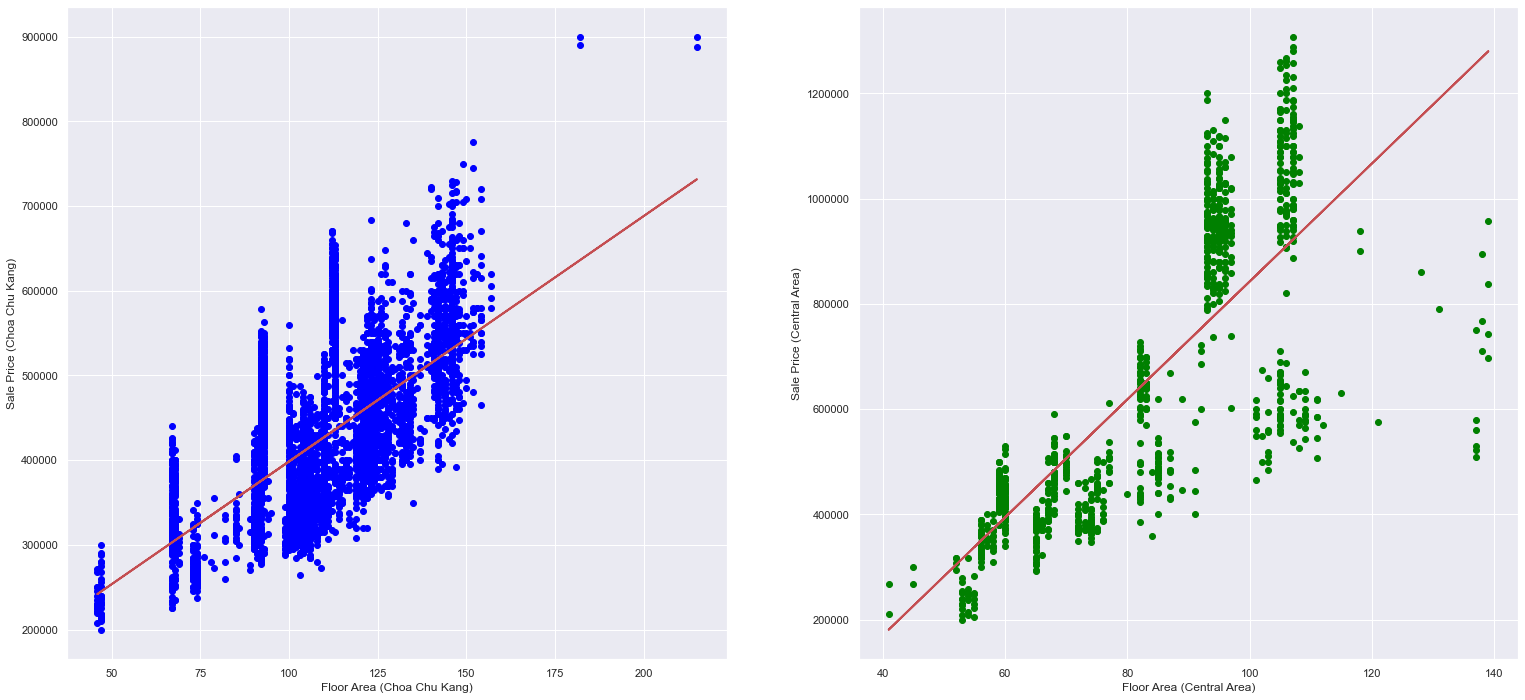

In [49]:
#line 155, the best performing area is Choa Chu Kang while the worst is Central Area. Plot the two to compare
f, axes = plt.subplots(1, 2, figsize=(26, 12))
plt.ticklabel_format(useOffset=False, style = 'plain')
 
# choa chu kang

floor_area_cck = pd.DataFrame(choa_chu_kang["floor_area_sqm"])
sale_price_cck = pd.DataFrame(choa_chu_kang["resale_price"])


linreg.fit(floor_area_cck, sale_price_cck)

print('Choa Chu Kang Datapoints \t \t \t \t: ', choa_chu_kang["town"].count())
print('Choa Chu Kang Gradient \t \t \t \t \t: ', linreg.coef_)
print('Choa Chu Kang Intercept \t \t \t \t: ', linreg.intercept_)
print("Explained Variance (R^2) on Choa Chu Kang Set \t \t: ", linreg.score(floor_area_cck, sale_price_cck))
print()
    
# Predict values corresponding to the four variables
sale_price_cck_pred = linreg.predict(floor_area_cck)
    
axes[0].scatter(floor_area_cck, sale_price_cck, color = "blue")
axes[0].plot(floor_area_cck, sale_price_cck_pred, 'r-', linewidth = 2)
axes[0].set_xlabel("Floor Area (Choa Chu Kang)")
axes[0].set_ylabel("Sale Price (Choa Chu Kang)")

# central area

floor_area_central = pd.DataFrame(central_area["floor_area_sqm"])
sale_price_central = pd.DataFrame(central_area["resale_price"])


linreg.fit(floor_area_central, sale_price_central)

print('Central Area Datapoints \t \t \t \t: ', central_area["town"].count())
print('Central Area Gradient \t \t \t \t \t: ', linreg.coef_)
print('Central Area Intercept \t \t \t \t \t: ', linreg.intercept_)
print("Explained Variance (R^2) on Central Area Set \t: ", linreg.score(floor_area_central, sale_price_central))
print()
    
 # Predict values corresponding to the four varibles
sale_price_central_pred = linreg.predict(floor_area_central)
    
axes[1].scatter(floor_area_central, sale_price_central, color = "green")
axes[1].plot(floor_area_central, sale_price_central_pred, 'r-', linewidth = 2)
axes[1].set_xlabel("Floor Area (Central Area)")
axes[1].set_ylabel("Sale Price (Central Area)")

plt.show() #Line 199

From the graphs, we can see where the difference between Choa Chu Kang and Central Area lays. In Central Area, the flats which have an area of 90-110 m^2 are priced so much higher compared to their counterpart in Choa Chu Kang, which causes the gradient to be higher

## Part 2 : Decision Tree

From the first part, we have concluded that Choa Chu Kang is the area that is the most "worth it" in terms of pricing to area. We can then use a decision tree model to predict what kind of flat type we can get using resale price and floor area as the predictors. This is useful for flat buyers if they know their budget and the dimension of flat that they want to get.

First of all, we need to change the flat type, the variable that we are predicting, into category.

In [50]:
choa_chu_kang['flat_type'] = choa_chu_kang['flat_type'].astype('category')
choa_chu_kang.dtypes

town                object
floor_area_sqm     float64
resale_price       float64
flat_type         category
month               object
dtype: object

We can then see the count of each flat type in Choa Chu Kang.

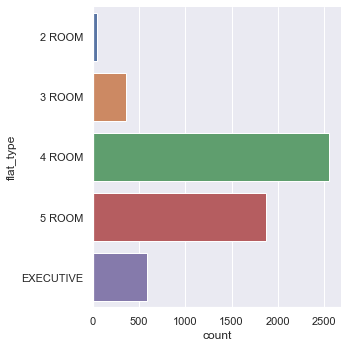

In [51]:
sb.catplot(y = 'flat_type',data = choa_chu_kang, kind = "count")

To visualize the distribution better, we can use a swarm plot to see the counts of each flat type aginst the price.

<AxesSubplot:xlabel='resale_price', ylabel='flat_type'>

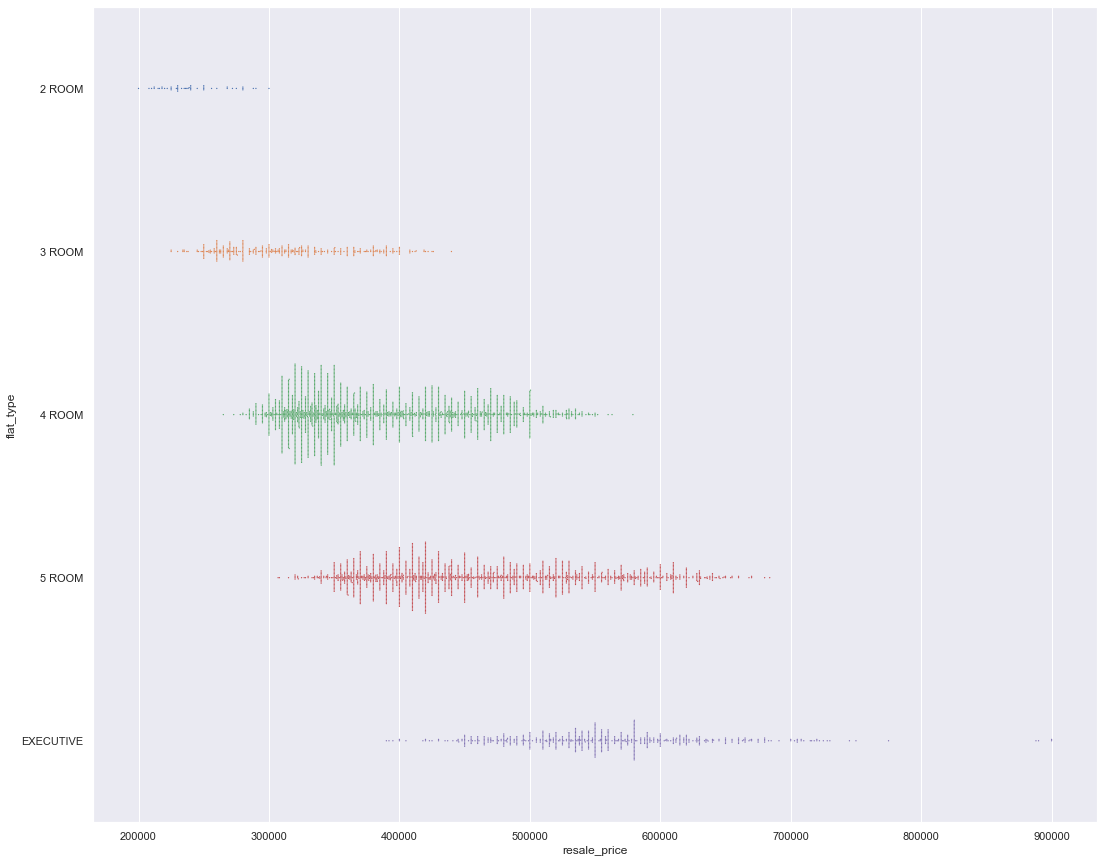

In [52]:
f = plt.subplots(figsize=(18, 15))
sb.swarmplot(x = 'resale_price', y = 'flat_type', data = choa_chu_kang, size = 1.3)

From the swarmplot, we can see that there are some distinctions between the type, although the 4 room and 5 room flat type has a lot of overlaps.

We are going the models from scikit-learn in order to create the decision tree.

In [97]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

We will create new dataframes where y is the variable we are going to predict and X is the predictors. We will then create the test set using the train_test_split function to make it a random set.

In [98]:
y = pd.DataFrame(choa_chu_kang['flat_type'])
X = pd.DataFrame(choa_chu_kang[['resale_price','floor_area_sqm']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2000, random_state=42)

In [99]:
dectree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [100]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [101]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9661214953271028

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.971



We can see that the classification accuracy of both the train and test set is very high. This means that it is perfectly possible to classify the flat types based on the area of the flat and the price.

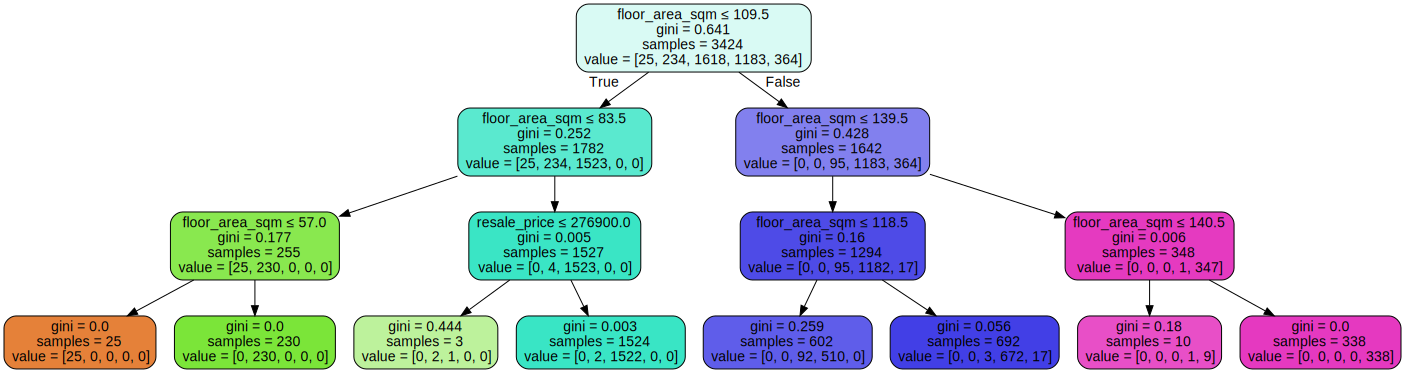

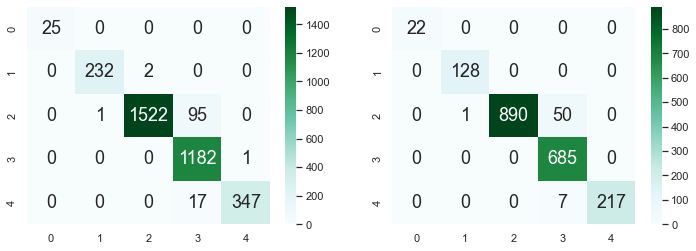

In [102]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuGn")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuGn")

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

In [103]:
y = pd.DataFrame(choa_chu_kang['flat_type'])
X = pd.DataFrame(choa_chu_kang[['floor_area_sqm']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2000, random_state=42)

In [104]:
dectree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [105]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [106]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9658294392523364

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9715



In [107]:
y = pd.DataFrame(choa_chu_kang['flat_type'])
X = pd.DataFrame(choa_chu_kang[['resale_price']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2000, random_state=42)

In [108]:
dectree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [109]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [110]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5917056074766355

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5815

